# Google Play Dataset And Findings

In [95]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## # Cleaning The Data Set and Getting Basic Information About Data Set:

#### (i) For Overview printing the first and last 10 Rows:

In [96]:
df=pd.read_csv('googleplaystore.csv')

print("First 10 Rows : \n",df.head(10).to_string(),"\n\n")
print("Last 10 Rows : \n",df.tail(10).to_string())

First 10 Rows : 
                                                   App        Category  Rating Reviews  Size     Installs  Type Price Content Rating                     Genres        Last Updated         Current Ver   Android Ver
0      Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1     159   19M      10,000+  Free     0       Everyone               Art & Design     January 7, 2018               1.0.0  4.0.3 and up
1                                 Coloring book moana  ART_AND_DESIGN     3.9     967   14M     500,000+  Free     0       Everyone  Art & Design;Pretend Play    January 15, 2018               2.0.0  4.0.3 and up
2  U Launcher Lite – FREE Live Cool Themes, Hide Apps  ART_AND_DESIGN     4.7   87510  8.7M   5,000,000+  Free     0       Everyone               Art & Design      August 1, 2018               1.2.4  4.0.3 and up
3                               Sketch - Draw & Paint  ART_AND_DESIGN     4.5  215644   25M  50,000,000+  Free     0           Tee

#### (ii) Getting basic info:

In [97]:
print("\n\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


 None


In [98]:
print("\n\n", df.describe())



             Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


#### (iii) Printing every column name for understanding dataset:

In [99]:
print(df.columns)
print("\n\n\n", df.size)
print("\n\n\n", df.shape)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')



 140933



 (10841, 13)


#### (iv) Finding NaN values in each column:

In [100]:
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


#### (v) deleting non necessary null values containing rows:
---> as some columns have only 1-10 null values hence removing/deleting them from dataset will not affect our finding much s

In [101]:
df.dropna(subset=["Type","Content Rating", "Current Ver", "Android Ver"],inplace=True)
print(df.isnull().sum())

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64


----> but the "Rating" column have very large number of rows with null values so we cant delete them, hence replacing the null values with mean() of "Rating" column

In [102]:
df["Rating"]=pd.to_numeric(df["Rating"],errors='coerce')
df["Rating"].fillna(df["Rating"].mean(), inplace=True)
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


/var/folders/j3/xxzh4f157s9dcyshl829bff40000gn/T/ipykernel_15688/2970753002.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Rating"].fillna(df["Rating"].mean(), inplace=True)


#### (v) Finally we have almost done cleaning the dataset hence printing again to see cleaned dataset:

In [121]:
print("First 10 Rows : \n",df.head(10).to_string(),"\n\n")
print("Last 10 Rows : \n",df.tail(10).to_string())

First 10 Rows : 
                                                   App        Category  Rating Reviews  Size     Installs  Type  Price Content Rating                     Genres        Last Updated         Current Ver   Android Ver paid_or_free
0      Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1     159   19M      10,000+  Free    0.0       Everyone               Art & Design     January 7, 2018               1.0.0  4.0.3 and up         free
1                                 Coloring book moana  ART_AND_DESIGN     3.9     967   14M     500,000+  Free    0.0       Everyone  Art & Design;Pretend Play    January 15, 2018               2.0.0  4.0.3 and up         free
2  U Launcher Lite – FREE Live Cool Themes, Hide Apps  ART_AND_DESIGN     4.7   87510  8.7M   5,000,000+  Free    0.0       Everyone               Art & Design      August 1, 2018               1.2.4  4.0.3 and up         free
3                               Sketch - Draw & Paint  ART_AND_DESIGN     

## 1. Total Number of apps per category:

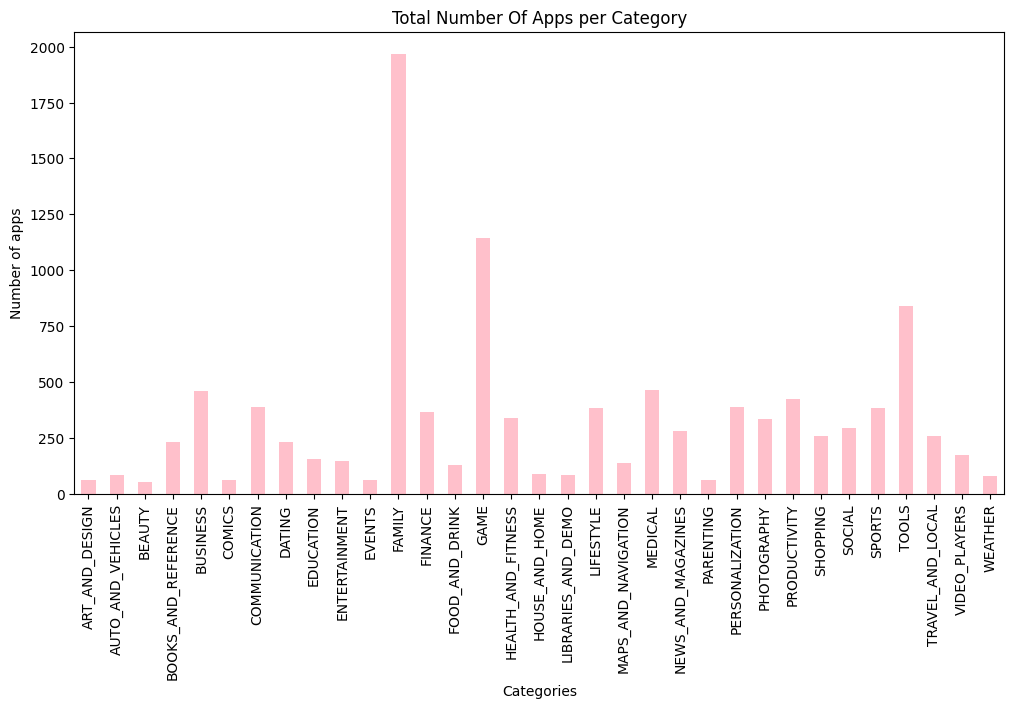

In [104]:
apps_category_group= df.groupby("Category")["App"].count()

plt.figure(figsize=(12,6))
apps_category_group.plot(kind="bar",color="pink")
plt.title("Total Number Of Apps per Category")
plt.xlabel("Categories")
plt.ylabel("Number of apps")
plt.show()

In [105]:
print("The Category with least number of apps is",apps_category_group.idxmin(),"that is",apps_category_group.min(),"apps")
print("The Category with most number of apps is",apps_category_group.idxmax(),"that is",apps_category_group.max(),"apps")

# print(apps_category_group.to_string())

The Category with least number of apps is BEAUTY that is 53 apps
The Category with most number of apps is FAMILY that is 1968 apps


## 2. Free apps vs paid apps:

In [125]:
count_price=df.groupby("Type")["App"].count()
print(count_price)

Type
Free    10032
Paid      797
Name: App, dtype: int64


Text(0.5, 1.0, 'Pie Showing Free vs Paid apps')

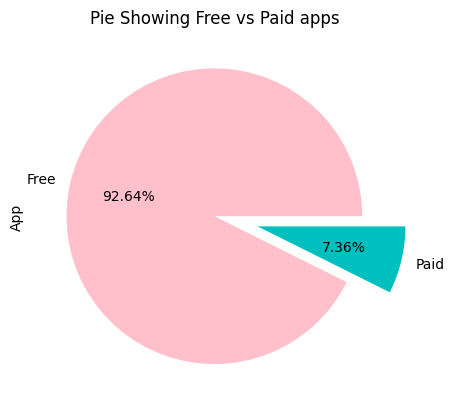

In [146]:
ex=[0.0,0.3]

count_price.plot(kind="pie",colors=["pink","c"],radius=1,autopct="%0.2f%%",explode=ex )
plt.title("Pie Showing Free vs Paid apps")